<a href="https://colab.research.google.com/github/KaziMuktadirAhmed/WISER-womenium-2025-project-1/blob/main/WISER-quantum-walk-monte-carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Run this cell first to install all necessary packages.
# After this finishes, you MUST restart the runtime.
# Go to the menu: Runtime -> Restart session
!pip install -q qiskit qiskit-aer matplotlib pylatexenc
print("✅ All packages installed successfully. Please restart the runtime now.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.0 MB/s eta 0:00:00
✅ All packages installed successfully. Please restart the runtime now.



--- Generating Circuit Diagram ---
Displaying circuit diagram in cell output:


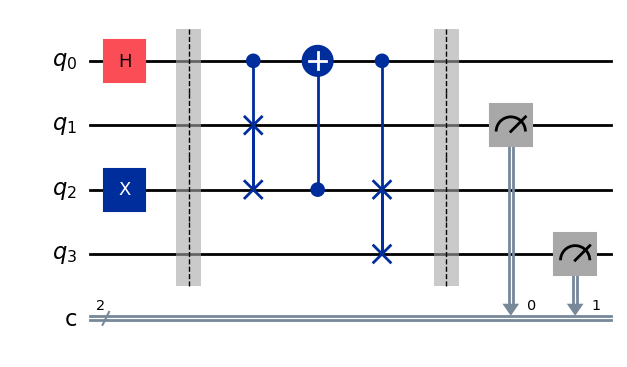


--- Simulation Results ---
{'01': 4114, '10': 4078}

--- Generating Histogram ---
Displaying histogram in cell output:


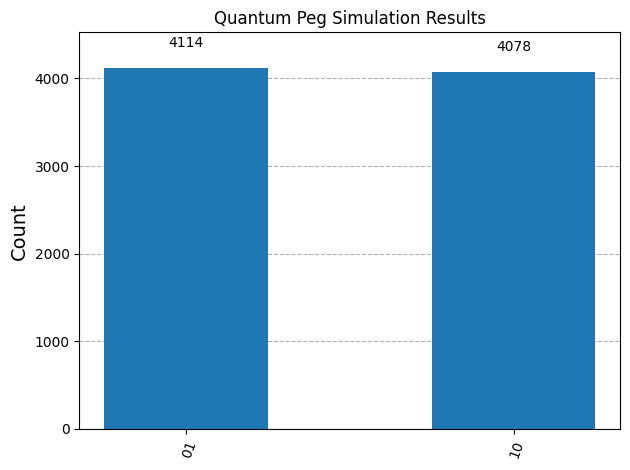

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_quantum_peg_circuit():
    """
    Generates a Qiskit QuantumCircuit for a single 'quantum peg' as
    described in the "Universal Statistical Simulator" paper (Fig. 3).

    The circuit uses 4 qubits, mapped as follows from the paper:
    - q0: The control qubit that determines the path (left/right).
    - q1: The 'left' output channel.
    - q2: The input channel where the 'ball' starts.
    - q3: The 'right' output channel.

    Returns:
        QuantumCircuit: A Qiskit circuit object representing one quantum peg.
    """
    qc = QuantumCircuit(4, 2, name="Quantum Peg")
    qc.x(2)
    qc.h(0)
    qc.barrier()
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.barrier()
    qc.measure([1, 3], [0, 1])

    return qc

if __name__ == '__main__':
    peg_circuit = create_quantum_peg_circuit()

    print("\n--- Generating Circuit Diagram ---")
    circuit_diagram = peg_circuit.draw("mpl")

    if IS_IPYTHON:
        print("Displaying circuit diagram in cell output:")
        display(circuit_diagram)

    circuit_filename = "quantum_peg_circuit.png"
    # circuit_diagram.savefig(circuit_filename)
    # print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    simulator = AerSimulator()
    compiled_circuit = transpile(peg_circuit, simulator)
    job = simulator.run(compiled_circuit, shots=8192)
    result = job.result()
    counts = result.get_counts(compiled_circuit)

    print("\n--- Simulation Results ---")
    print(counts)

    print("\n--- Generating Histogram ---")
    histogram_figure = plot_histogram(counts, title="Quantum Peg Simulation Results")

    if IS_IPYTHON:
        print("Displaying histogram in cell output:")
        display(histogram_figure) # This renders the plot in the notebook

    # histogram_filename = "quantum_peg_histogram.png"
    # histogram_figure.savefig(histogram_filename)
    # print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    plt.close('all')


--- Generating Circuit Diagram ---


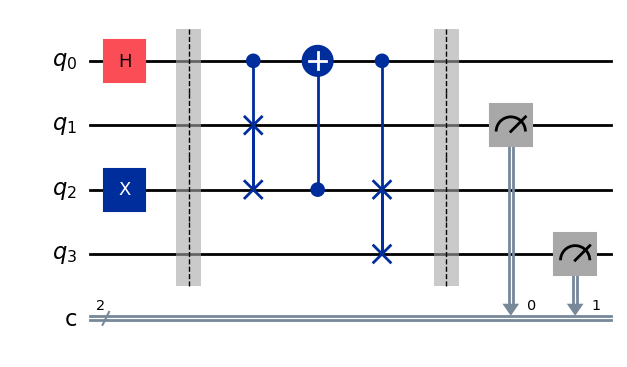

Circuit diagram also saved to: /content/quantum_peg_circuit.png

--- Running circuit with Sampler ---

--- Sampler Results (Probabilities) ---
{'01': 0.4952392578125, '10': 0.5047607421875}

--- Generating Histogram ---


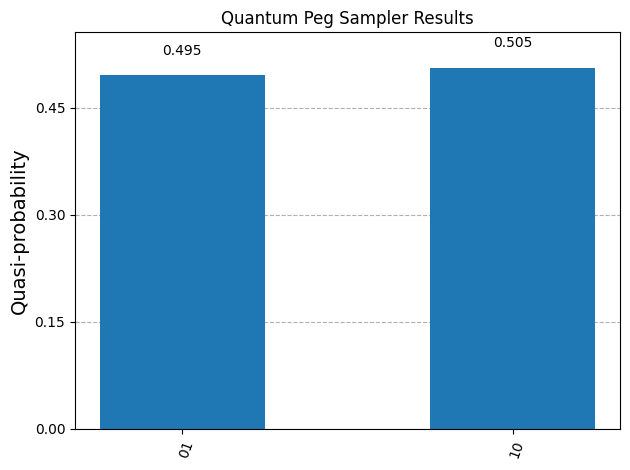

Histogram also saved to: /content/quantum_peg_histogram.png


In [3]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_quantum_peg_circuit():
    qc = QuantumCircuit(4, 2, name="Quantum Peg")

    qc.x(2)
    qc.h(0)
    qc.barrier()
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.barrier()
    qc.measure([1, 3], [0, 1])

    return qc

if __name__ == '__main__':
    peg_circuit = create_quantum_peg_circuit()

    print("\n--- Generating Circuit Diagram ---")
    circuit_diagram = peg_circuit.draw("mpl")
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = "quantum_peg_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(peg_circuit, shots=8192)
    result = job.result()

    quasi_dist = result.quasi_dists[0]
    probabilities = quasi_dist.binary_probabilities()

    print("\n--- Sampler Results (Probabilities) ---")
    print(probabilities)

    print("\n--- Generating Histogram ---")
    histogram_figure = plot_histogram(probabilities, title="Quantum Peg Sampler Results")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = "quantum_peg_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    plt.close('all')

# N-Layer QGB

### P-Gate: Hadamard
### Distribution: Gaussian


--- Generating Circuit Diagram for 6-Layer QGB ---


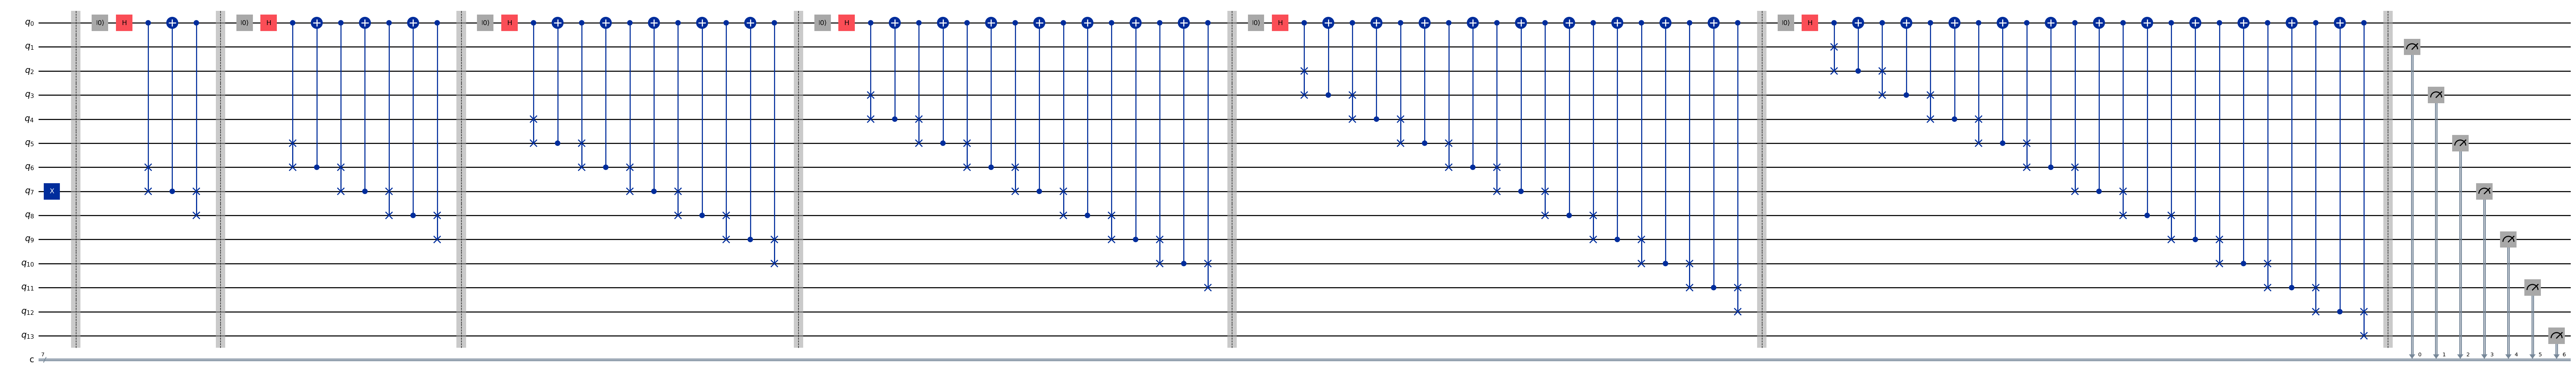

Circuit diagram also saved to: /content/6_layer_qgb_circuit.png

--- Running circuit with Sampler ---

--- Sampler Results (Probabilities) ---
{0: 0.016357421875, 1: 0.096923828125, 2: 0.2281494140625, 3: 0.3212890625, 4: 0.2254638671875, 5: 0.097412109375, 6: 0.014404296875}

--- Generating Final Distribution Histogram ---


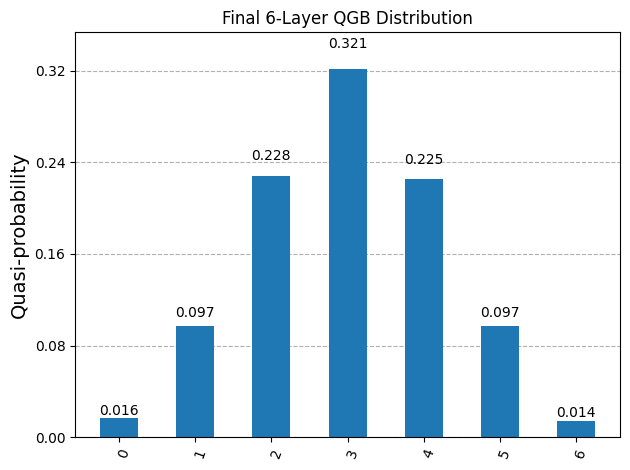

Histogram also saved to: /content/6_layer_qgb_histogram.png


In [4]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os
from collections import defaultdict

# Try to import the display function from IPython for inline plotting
try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_n_layer_qgb(n_layers: int):
    """
    Generates a Qiskit QuantumCircuit for an N-layer Quantum Galton Board.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the N-layer QGB.
    """
    # An n-layer board has n+1 output bins.
    # Total qubits needed: 1 (control) + (n_layers + 1) (for outputs) + n_layers (for intermediate paths)
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1  # Add 1 for the control qubit
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    # Place the initial 'ball' at the top of the pyramid.
    # Qubit indices are offset by 1 because q0 is the control.
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        # For each layer, reset and re-superpose the control qubit
        qc.reset(control_qubit)
        qc.h(control_qubit)

        # Determine the positions of the pegs in the current layer
        # These are the possible locations of the ball from the previous layer.
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            # Apply the standard "quantum peg" logic
            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            # As per the paper's description, a rebalancing CNOT is needed
            # to ensure the control qubit is correctly prepared for the next peg in the same row.
            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

    # --- Step 3: Measurement ---
    # The final output bins are the odd-numbered working qubits.
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

# --- Example Usage ---
if __name__ == '__main__':
    # Define the number of layers for the Galton Board
    N_LAYERS = 6

    # 1. Create the N-layer QGB circuit
    qgb_circuit = create_n_layer_qgb(N_LAYERS)

    # 2. Draw the circuit and display/save it
    print(f"\n--- Generating Circuit Diagram for {N_LAYERS}-Layer QGB ---")
    circuit_diagram = qgb_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = f"{N_LAYERS}_layer_qgb_circuit.png"
    # circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    # 3. Use the Sampler to run the circuit
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(qgb_circuit, shots=8192)
    result = job.result()

    # 4. Process the results from the Sampler
    quasi_dist = result.quasi_dists[0]
    raw_probabilities = quasi_dist.binary_probabilities()

    # Post-process the one-hot encoded results into a final distribution
    final_distribution = defaultdict(float)
    for bitstring, prob in raw_probabilities.items():
        # Qiskit bitstrings are little-endian (read right-to-left)
        # '00100' -> position 2
        try:
            position = bitstring.index('1')
            final_distribution[position] += prob
        except ValueError:
            # This handles the case of an all-zero bitstring, which can occur due to noise
            pass

    print("\n--- Sampler Results (Probabilities) ---")
    # Sort by position for cleaner printing
    print({k: v for k, v in sorted(final_distribution.items())})

    # 5. Plot the final processed distribution
    print("\n--- Generating Final Distribution Histogram ---")
    histogram_figure = plot_histogram(final_distribution, title=f"Final {N_LAYERS}-Layer QGB Distribution")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = f"{N_LAYERS}_layer_qgb_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    # Close all plot figures to free up memory
    plt.close('all')

# N-Layer QGB with reset optimization

### P-Gate: Hadamard
### Distribution: Gaussian


--- Generating Circuit Diagram for 8-Layer QGB ---


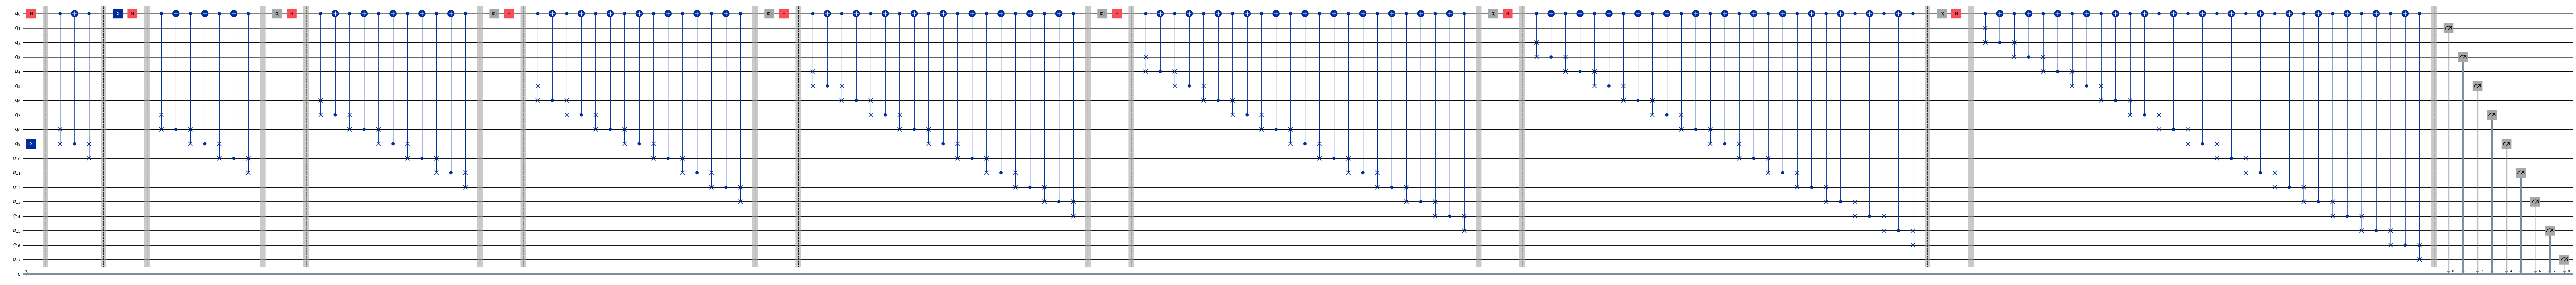

Circuit diagram also saved to: /content/8_layer_qgb_circuit.png

--- Running circuit with Sampler ---

--- Sampler Results (Probabilities) ---
{0: 0.0037841796875, 1: 0.029052734375, 2: 0.1051025390625, 3: 0.2205810546875, 4: 0.276123046875, 5: 0.221435546875, 6: 0.11181640625, 7: 0.029052734375, 8: 0.0030517578125}

--- Generating Final Distribution Histogram ---


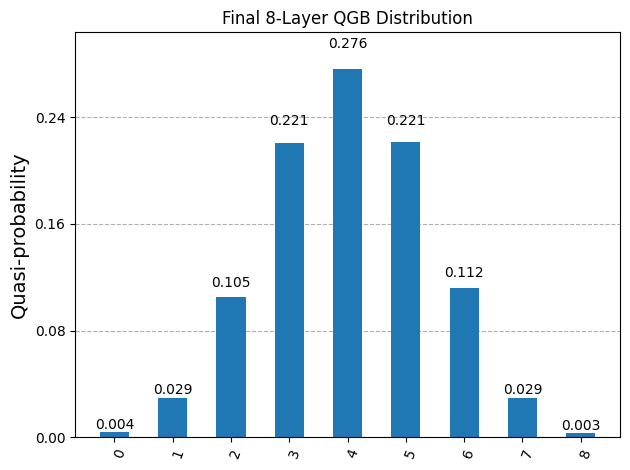

Histogram also saved to: /content/8_layer_qgb_histogram.png


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os
from collections import defaultdict

# Try to import the display function from IPython for inline plotting
try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_n_layer_qgb(n_layers: int):
    """
    Generates an optimized Qiskit QuantumCircuit for an N-layer Quantum Galton Board.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the N-layer QGB.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    # Prepare control qubit for the first layer
    qc.h(control_qubit)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        # --- Peg Logic for the current layer ---
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            # Apply the standard "quantum peg" logic
            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            # Rebalancing CNOT for pegs within the same layer
            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

        # --- OPTIMIZED Control Qubit Preparation for the *next* layer ---
        if layer < n_layers - 1:  # No need to prepare after the last layer
            if layer == 0:
                # After layer 0 (1 peg), control qubit is in state |1>.
                # Optimize by flipping to |0> then applying Hadamard.
                # This is more efficient than a full reset.
                qc.x(control_qubit)
                qc.h(control_qubit)
            else:
                # For subsequent layers, state is entangled. Reset is cleanest.
                qc.reset(control_qubit)
                qc.h(control_qubit)
            qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

# --- Example Usage ---
if __name__ == '__main__':
    # Define the number of layers for the Galton Board
    N_LAYERS = 8

    # 1. Create the N-layer QGB circuit
    qgb_circuit = create_n_layer_qgb(N_LAYERS)

    # 2. Draw the circuit and display/save it
    print(f"\n--- Generating Circuit Diagram for {N_LAYERS}-Layer QGB ---")
    circuit_diagram = qgb_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = f"{N_LAYERS}_layer_qgb_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    # 3. Use the Sampler to run the circuit
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(qgb_circuit, shots=8192)
    result = job.result()

    # 4. Process the results from the Sampler
    quasi_dist = result.quasi_dists[0]
    raw_probabilities = quasi_dist.binary_probabilities()

    # Post-process the one-hot encoded results into a final distribution
    final_distribution = defaultdict(float)
    for bitstring, prob in raw_probabilities.items():
        # Qiskit bitstrings are little-endian (read right-to-left)
        try:
            position = bitstring.index('1')
            final_distribution[position] += prob
        except ValueError:
            # This handles the case of an all-zero bitstring, which can occur due to noise
            pass

    print("\n--- Sampler Results (Probabilities) ---")
    # Sort by position for cleaner printing
    print({k: v for k, v in sorted(final_distribution.items())})

    # 5. Plot the final processed distribution
    print("\n--- Generating Final Distribution Histogram ---")
    histogram_figure = plot_histogram(final_distribution, title=f"Final {N_LAYERS}-Layer QGB Distribution")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = f"{N_LAYERS}_layer_qgb_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    # Close all plot figures to free up memory
    plt.close('all')

# Biased QGB code for n-layer
### X-rotation: 120<sup>0</sup>


--- Generating Circuit Diagram for 8-Layer Biased QGB ---


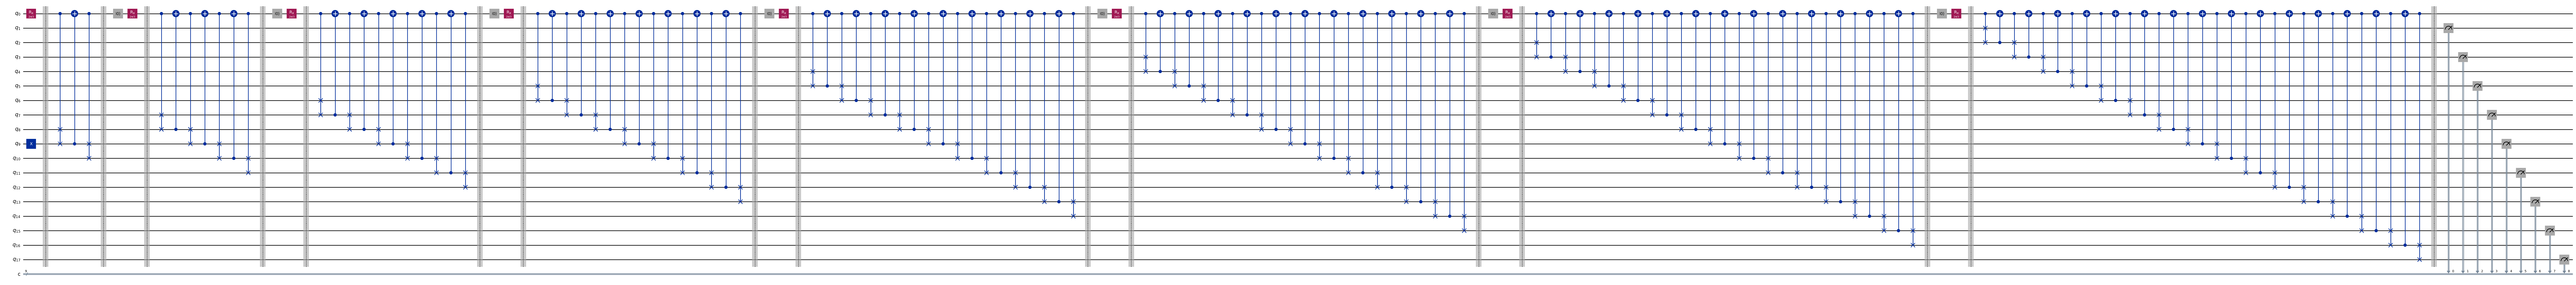

Circuit diagram also saved to: /content/8_layer_biased_qgb_circuit.png

--- Running circuit with Sampler ---

--- Sampler Results (Raw Bitstring Probabilities) ---
{'000000001': 0.0997314453125, '000000010': 0.26904296875, '000000100': 0.3038330078125, '000001000': 0.2161865234375, '000010000': 0.085205078125, '000100000': 0.0224609375, '001000000': 0.003173828125, '010000000': 0.0003662109375}

--- Generating Raw Distribution Histogram ---


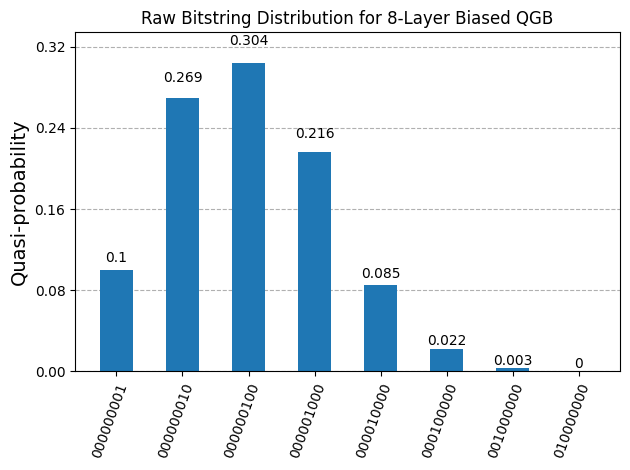

Histogram also saved to: /content/8_layer_biased_qgb_histogram.png


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os
from collections import defaultdict

# Try to import the display function from IPython for inline plotting
try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_biased_n_layer_qgb(n_layers: int, bias_angle: float = np.pi/2):
    """
    Generates a Qiskit QuantumCircuit for a Biased N-layer Quantum Galton Board.

    Args:
        n_layers: The number of peg layers in the Galton board.
        bias_angle: The rotation angle (theta) for the Rx gate, controlling the bias.
                    np.pi/2 gives a fair 50/50 distribution (like a Hadamard gate).
                    2*np.pi/3 gives a 75/25 distribution as per the paper.

    Returns:
        A Qiskit QuantumCircuit object for the Biased N-layer QGB.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer Biased QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    # Prepare control qubit for the first layer using the bias angle
    qc.rx(bias_angle, control_qubit)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        # --- Peg Logic for the current layer ---
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            # Apply the standard "quantum peg" logic
            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            # Rebalancing CNOT for pegs within the same layer
            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

        # --- Control Qubit Preparation for the *next* layer ---
        if layer < n_layers - 1:  # No need to prepare after the last layer
            # For a biased board, a reset is the most general and clean way
            # to prepare the control qubit for the next layer's unique bias.
            qc.reset(control_qubit)
            qc.rx(bias_angle, control_qubit)
            qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

# --- Example Usage ---
if __name__ == '__main__':
    # --- Parameters for the simulation ---
    N_LAYERS = 8
    # Use the angle from the paper for a 75/25 split
    BIAS_ANGLE = 2 * np.pi / 3

    # 1. Create the Biased N-layer QGB circuit
    qgb_circuit = create_biased_n_layer_qgb(N_LAYERS, BIAS_ANGLE)

    # 2. Draw the circuit and display/save it
    print(f"\n--- Generating Circuit Diagram for {N_LAYERS}-Layer Biased QGB ---")
    circuit_diagram = qgb_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = f"{N_LAYERS}_layer_biased_qgb_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    # 3. Use the Sampler to run the circuit
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(qgb_circuit, shots=8192)
    result = job.result()

    # 4. Get the raw probability distribution from the Sampler
    quasi_dist = result.quasi_dists[0]
    raw_probabilities = quasi_dist.binary_probabilities()

    print("\n--- Sampler Results (Raw Bitstring Probabilities) ---")
    print({k: v for k, v in sorted(raw_probabilities.items())})

    # 5. Plot the raw distribution with bitstrings on the x-axis
    print("\n--- Generating Raw Distribution Histogram ---")
    histogram_figure = plot_histogram(raw_probabilities, title=f"Raw Bitstring Distribution for {N_LAYERS}-Layer Biased QGB")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = f"{N_LAYERS}_layer_biased_qgb_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    # Close all plot figures to free up memory
    plt.close('all')

### Hadamard quantum walk
### P-gate: H
### Key changes made:
  - removed the reset to 0 in each layer
  - used a hadamard gate instead of using rx with a bias of 90<sup>0</sup>


--- Generating Circuit Diagram for 6-Layer Hadamard Walk ---


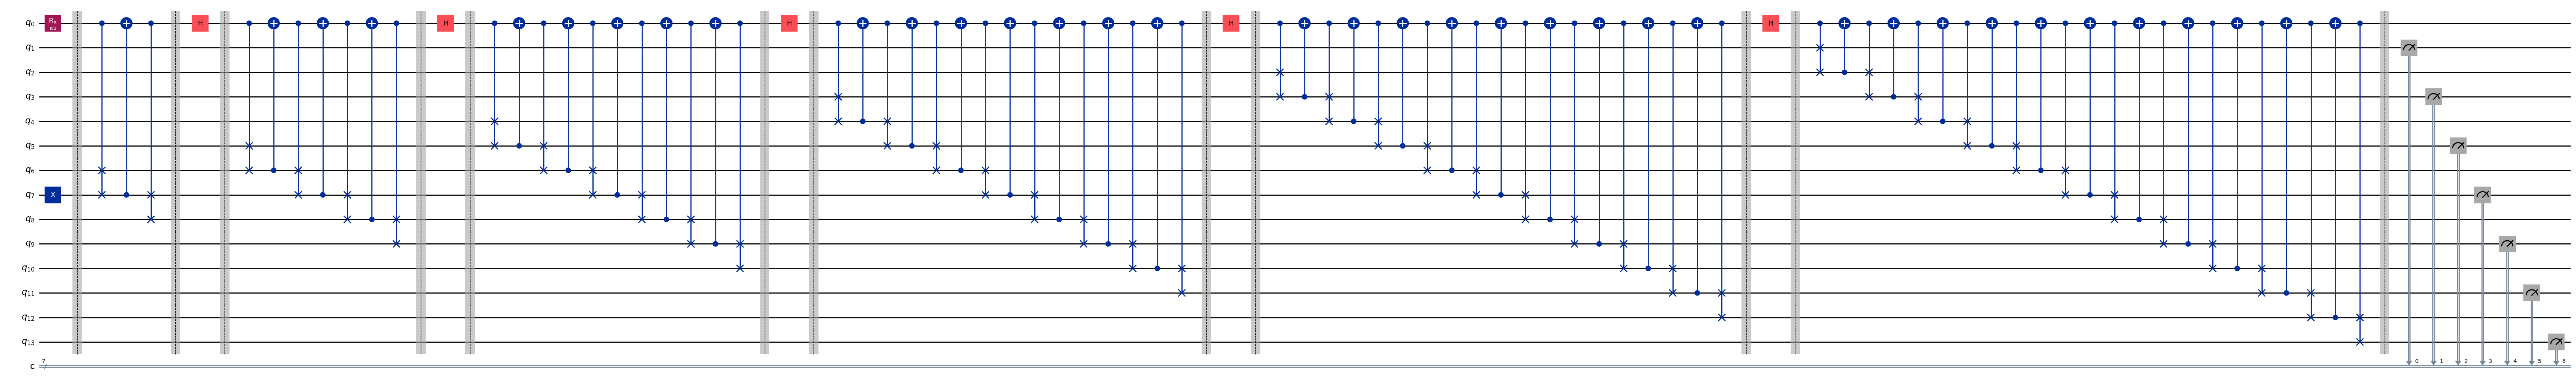

Circuit diagram also saved to: /content/6_layer_hadamard_walk_circuit.png

--- Running circuit with Sampler ---

--- Sampler Results (Raw Bitstring Probabilities) ---
{'0000001': 0.01397705078125, '0000010': 0.28326416015625, '0000100': 0.13995361328125, '0001000': 0.1268310546875, '0010000': 0.14337158203125, '0100000': 0.2772216796875, '1000000': 0.015380859375}

--- Generating Raw Distribution Histogram ---


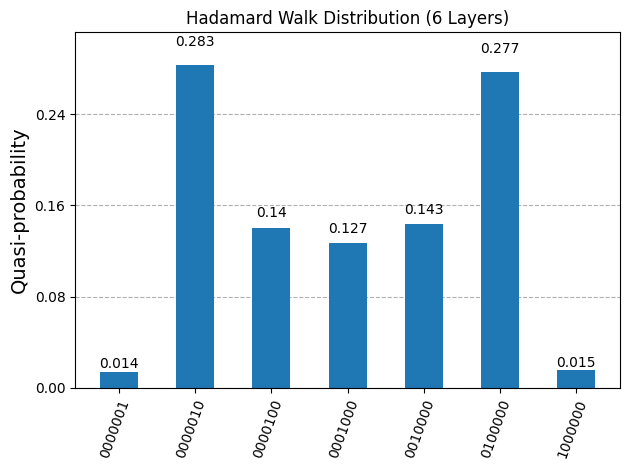

Histogram also saved to: /content/6_layer_hadamard_walk_histogram.png


In [6]:
# Step 2: After restarting the runtime, run this cell.
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os
from collections import defaultdict

# Try to import the display function from IPython for inline plotting
try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_hadamard_walk_qgb(n_layers: int):
    """
    Generates a Qiskit Circuit for a Quantum Galton Board that performs
    a Hadamard Quantum Walk. This is achieved by using a bias angle of pi/2,
    which is equivalent to using a Hadamard gate as the "coin" at each step.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the Hadamard Walk QGB.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer Hadamard Walk")

    control_qubit = 0
    bias_angle = np.pi / 2  # This angle makes the Rx gate act like a Hadamard

    # --- Step 1: Initialization ---
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.rx(bias_angle, control_qubit)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

        if layer < n_layers - 1:
            # qc.reset(control_qubit)
            # qc.rx(bias_angle, control_qubit)
            qc.h(control_qubit)
            qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

# --- Example Usage ---
if __name__ == '__main__':
    # --- Parameters for the simulation ---
    N_LAYERS = 6 # Using more layers to better see the distribution shape

    # 1. Create the Hadamard Walk QGB circuit
    qgb_circuit = create_hadamard_walk_qgb(N_LAYERS)

    # 2. Draw the circuit and display/save it
    print(f"\n--- Generating Circuit Diagram for {N_LAYERS}-Layer Hadamard Walk ---")
    circuit_diagram = qgb_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = f"{N_LAYERS}_layer_hadamard_walk_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    # 3. Use the Sampler to run the circuit
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(qgb_circuit, shots=16384) # More shots for better stats
    result = job.result()

    # 4. Get the raw probability distribution from the Sampler
    quasi_dist = result.quasi_dists[0]
    raw_probabilities = quasi_dist.binary_probabilities()

    print("\n--- Sampler Results (Raw Bitstring Probabilities) ---")
    print({k: v for k, v in sorted(raw_probabilities.items())})

    # 5. Plot the raw distribution with bitstrings on the x-axis
    print("\n--- Generating Raw Distribution Histogram ---")
    histogram_figure = plot_histogram(raw_probabilities, title=f"Hadamard Walk Distribution ({N_LAYERS} Layers)")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = f"{N_LAYERS}_layer_hadamard_walk_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    # Close all plot figures to free up memory
    plt.close('all')


--- Generating Circuit Diagram for 8-Layer Sculpted QGB ---


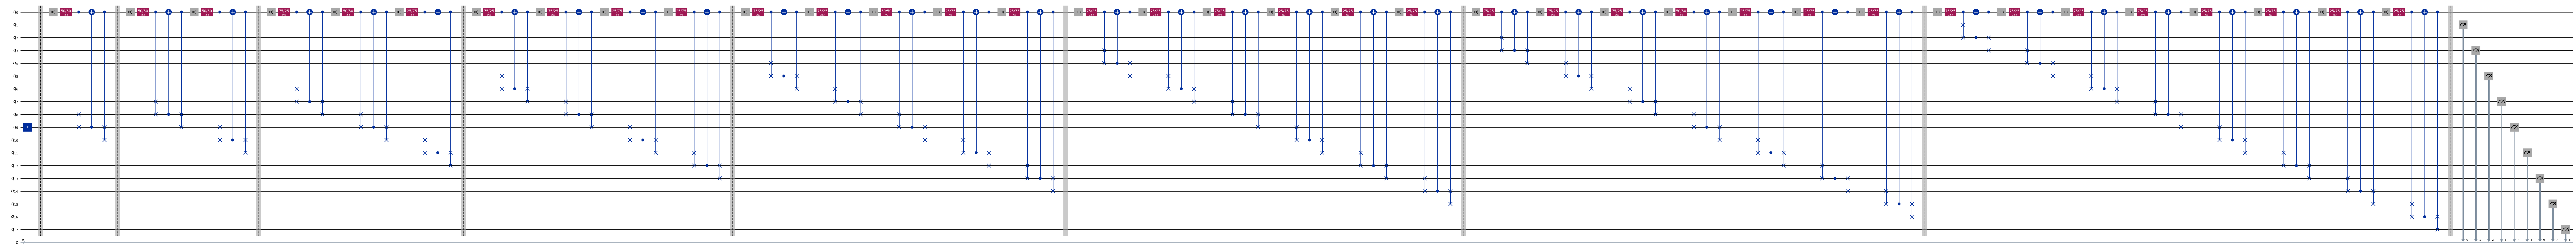

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os
from collections import defaultdict

# Try to import the display function from IPython for inline plotting
try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_sculpted_qgb(n_layers: int):
    """
    Generates a circuit for a fine-grained biased Galton Board, where the
    bias of each peg depends on its position, as per the user's design.

    - Top n/4 layers: 50/50 probability (fair pegs).
    - Lower layers (left half): 75/25 probability (pushing left).
    - Lower layers (right half): 25/75 probability (pushing right).

    Args:
        n_layers: The total number of layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer Sculpted QGB")

    control_qubit = 0
    center_line_pos = n_layers + 1
    transition_layer = n_layers // 4

    # Define the bias angles for the Rx gates
    fair_angle = np.pi / 2          # Corresponds to 50/50
    left_push_angle = 2 * np.pi / 3  # Corresponds to 75/25 (more |0> -> left)
    right_push_angle = np.pi / 3     # Corresponds to 25/75 (more |1> -> right)

    # --- Step 1: Initialization ---
    qc.x(center_line_pos)
    qc.barrier()

    # --- Step 2: Build the Layers with Fine-Grained Bias ---
    for layer in range(n_layers):
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for peg_pos in peg_positions:
            # Determine the bias and label for the current peg
            if layer < transition_layer:
                bias_angle = fair_angle
                bias_label = "50/50"
            else:
                if peg_pos < center_line_pos:
                    bias_angle = left_push_angle
                    bias_label = "75/25"
                elif peg_pos > center_line_pos:
                    bias_angle = right_push_angle
                    bias_label = "25/75"
                else: # Peg is on the center line
                    bias_angle = fair_angle
                    bias_label = "50/50"

            # Apply the fine-grained peg logic: reset and apply biased rotation for each peg
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            qc.reset(control_qubit)
            # Add the custom label to the Rx gate
            qc.rx(bias_angle, control_qubit, label=bias_label)

            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

        qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

# --- Example Usage ---
if __name__ == '__main__':
    # --- Parameters for the simulation ---
    N_LAYERS = 8 # Using fewer layers to make the labeled circuit diagram readable

    # 1. Create the fine-grained biased QGB circuit
    qgb_circuit = create_sculpted_qgb(N_LAYERS)

    # 2. Draw the circuit and display/save it
    print(f"\n--- Generating Circuit Diagram for {N_LAYERS}-Layer Sculpted QGB ---")
    # Note: This circuit will be very large and may be slow to draw.
    circuit_diagram = qgb_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = f"{N_LAYERS}_layer_sculpted_qgb_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    # 3. Use the Sampler to run the circuit
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(qgb_circuit, shots=16384)
    result = job.result()

    # 4. Get the raw probability distribution from the Sampler
    quasi_dist = result.quasi_dists[0]
    raw_probabilities = quasi_dist.binary_probabilities()

    print("\n--- Sampler Results (Raw Bitstring Probabilities) ---")
    print({k: v for k, v in sorted(raw_probabilities.items())})

    # 5. Plot the raw distribution with bitstrings on the x-axis
    print("\n--- Generating Raw Distribution Histogram ---")
    filtered_probs = {k: v for k, v in raw_probabilities.items() if v > 0.001}
    histogram_figure = plot_histogram(filtered_probs, title=f"Sculpted QGB Distribution ({N_LAYERS} Layers)")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = f"{N_LAYERS}_layer_sculpted_qgb_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    # Close all plot figures to free up memory
    plt.close('all')